### Data Augmentation & Image Pipelines
- Image pipelines are an efficient way to handle large datasets
- Data Augmentation is a technique of augmenting data, which acts as a regularizer, hence reduces overfitting

In [10]:
import numpy as np
import keras
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
train_image_gen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
)

test_image_gen = ImageDataGenerator(
    rescale = 1/255.0
)

In [3]:
train_gen = train_image_gen.flow_from_directory(
    'Datasets/tiny-imagenet-200/train',
    target_size = ((224,224)),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 100000 images belonging to 200 classes.


(128, 224, 224, 3) (128, 200)


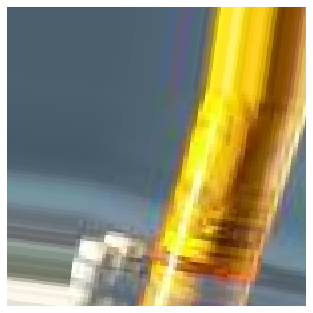

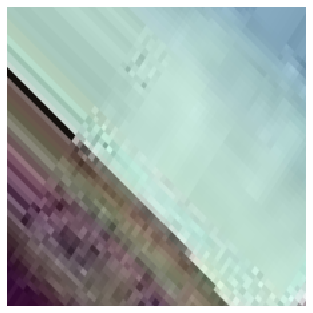

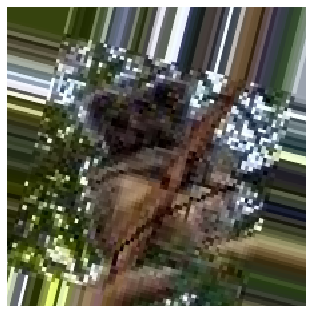

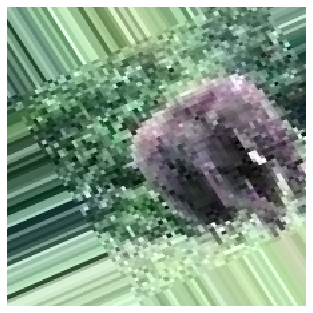

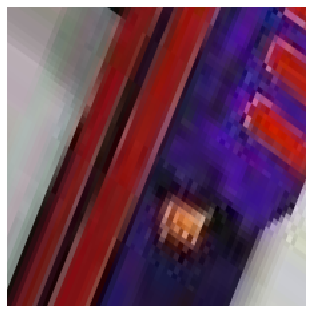

In [12]:
for (x,y) in train_gen:
    print(x.shape,y.shape)
    for i in range(5):
        plt.imshow(x[i])
        plt.axis('off')
        plt.show()
    break

In [5]:
class_ids = train_gen.class_indices

In [6]:
def load_validation_data(target_size,no_of_classes):
    with open('Datasets/tiny-imagenet-200/val/val_annotations.txt') as f:
        lines = f.readlines()
        m = len(lines)
        X = np.empty((m,*target_size,3))
        Y = np.empty(m)
        for i,line in enumerate(lines):
            tokens = line.split()
            img_name = tokens[0]
            img_label = tokens[1]
            img_url = os.path.join('Datasets/tiny-imagenet-200/val/images',img_name)
            img = image.load_img(img_url)
            img = img.resize(target_size)
            X[i,] = np.array(img,dtype=np.float32)/255.0
            img.close()
            Y[i] = class_ids[img_label]
    return X,keras.utils.to_categorical(Y,no_of_classes)

In [7]:
X_val,Y_val = load_validation_data((224,224),200)

In [8]:
print(X_val.shape,Y_val.shape)

(10000, 224, 224, 3) (10000, 200)
